# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import citipy
import json
import random
from pprint import pprint
from api_keys import weather_api_key
from api_keys import gkey
from citipy import citipy
from matplotlib import pyplot as plt
from scipy.stats import linregress

## Generate Cities List

In [2]:
# Generate geocoding df
latitude = np.random.uniform(-90,90,500)
longitude = np.random.uniform(-180,180,500)
 
df= pd.DataFrame({
        "Latitude":latitude,
        "Longitude":longitude
    })
df["Cities"]= ""
df

,Latitude,Longitude,Cities
0,48.247690,-14.052342,
1,-61.263477,87.635957,
2,39.701840,23.407450,
3,51.274296,-44.646373,
4,-57.070868,104.717368,
...,...,...,...
495,-17.308930,159.365477,
496,21.691779,-65.226594,
497,-49.918082,-79.429225,
498,-63.749574,104.420278,


In [3]:
# Look for nearest city with geo coordinates
for index, row in df.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    city = citipy.nearest_city(lat,lng)
    df.loc[index,"Cities"] = city.city_name
df = df[["Cities","Latitude","Longitude"]]
df

,Cities,Latitude,Longitude
0,dingle,48.247690,-14.052342
1,busselton,-61.263477,87.635957
2,skala fourkas,39.701840,23.407450
3,bonavista,51.274296,-44.646373
4,albany,-57.070868,104.717368
...,...,...,...
495,poum,-17.308930,159.365477
496,loiza,21.691779,-65.226594
497,coihaique,-49.918082,-79.429225
498,albany,-63.749574,104.420278


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set the dataframe
df["Max Temp"]=""
df["Humidity"]=""
df["Cloudiness"]=""
df["Wind Speed"]=""
df["Country"]=""
df["Date"]=""
df.head()

/Users/jiana/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jiana/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jiana/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,Cities,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dingle,48.247690,-14.052342,,,,,,
1,busselton,-61.263477,87.635957,,,,,,
2,skala fourkas,39.701840,23.407450,,,,,,
3,bonavista,51.274296,-44.646373,,,,,,
4,albany,-57.070868,104.717368,,,,,,


In [5]:
# use API calls to retrieve the data
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid":weather_api_key,
    "units":"imperial"
}
print('''
Beginning Data Retrieval     
-----------------------------
        ''')
for index, row in df.iterrows():
    city = row["Cities"]
    params["q"] = f"{city}"
    print(f"Processing Record {index} of 500 | {city}")
    weather_data = requests.get(base_url,params=params).json()
    try:
        df.loc[index,"Max Temp"] = weather_data["main"]["temp_max"]
        df.loc[index,"Humidity"] = weather_data["main"]["humidity"]
        df.loc[index,"Cloudiness"] = weather_data["clouds"]["all"]
        df.loc[index,"Wind Speed"] = weather_data["wind"]["speed"]
        df.loc[index,"Country"] = weather_data["sys"]["country"]
        df.loc[index,"Date"] = weather_data["dt"]
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
df


Beginning Data Retrieval     
-----------------------------
        
Processing Record 0 of 500 | dingle


/Users/jiana/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Processing Record 1 of 500 | busselton
Processing Record 2 of 500 | skala fourkas
Processing Record 3 of 500 | bonavista
Processing Record 4 of 500 | albany
Processing Record 5 of 500 | taolanaro
City not found. Skipping...
Processing Record 6 of 500 | clyde river
Processing Record 7 of 500 | tautira
Processing Record 8 of 500 | carnarvon
Processing Record 9 of 500 | mehamn
Processing Record 10 of 500 | makung
City not found. Skipping...
Processing Record 11 of 500 | victoria
Processing Record 12 of 500 | port alfred
Processing Record 13 of 500 | isla aguada
Processing Record 14 of 500 | maningrida
Processing Record 15 of 500 | vaini
Processing Record 16 of 500 | lianran
Processing Record 17 of 500 | berlevag
Processing Record 18 of 500 | maceio
Processing Record 19 of 500 | areosa
Processing Record 20 of 500 | port alfred
Processing Record 21 of 500 | warrington
Processing Record 22 of 500 | daye
Processing Record 23 of 500 | kaitangata
Processing Record 24 of 500 | cape town
Processi

,Cities,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dingle,48.247690,-14.052342,82.33,77,100,3.4,PH,1601428240
1,busselton,-61.263477,87.635957,64,80,99,10.42,AU,1601428240
2,skala fourkas,39.701840,23.407450,62.01,59,0,8.99,GR,1601428241
3,bonavista,51.274296,-44.646373,60.44,92,46,17.76,CA,1601428241
4,albany,-57.070868,104.717368,61,84,100,3.44,US,1601428241
...,...,...,...,...,...,...,...,...,...
495,poum,-17.308930,159.365477,71.53,66,4,11.56,NC,1601428359
496,loiza,21.691779,-65.226594,80.6,74,40,13.87,PR,1601428359
497,coihaique,-49.918082,-79.429225,39.2,51,20,5.82,CL,1601428270
498,albany,-63.749574,104.420278,61,84,100,3.44,US,1601428241


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Save Data to csv
df.to_csv("CitiWeather_Output.csv")


,Unnamed: 0,Cities,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,dingle,48.247690,-14.052342,82.33,77.0,100.0,3.40,PH,1.601428e+09
1,1,busselton,-61.263477,87.635957,64.00,80.0,99.0,10.42,AU,1.601428e+09
2,2,skala fourkas,39.701840,23.407450,62.01,59.0,0.0,8.99,GR,1.601428e+09
3,3,bonavista,51.274296,-44.646373,60.44,92.0,46.0,17.76,CA,1.601428e+09
4,4,albany,-57.070868,104.717368,61.00,84.0,100.0,3.44,US,1.601428e+09


In [4]:
# Read data from csv
weather_df = pd.read_csv("CitiWeather_Output.csv")
weather_df.head()

,Unnamed: 0,Cities,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,dingle,48.247690,-14.052342,82.33,77.0,100.0,3.40,PH,1.601428e+09
1,1,busselton,-61.263477,87.635957,64.00,80.0,99.0,10.42,AU,1.601428e+09
2,2,skala fourkas,39.701840,23.407450,62.01,59.0,0.0,8.99,GR,1.601428e+09
3,3,bonavista,51.274296,-44.646373,60.44,92.0,46.0,17.76,CA,1.601428e+09
4,4,albany,-57.070868,104.717368,61.00,84.0,100.0,3.44,US,1.601428e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# count the lines of dataframe
weather_df.count()

Unnamed: 0    500
Cities        500
Latitude      500
Longitude     500
Max Temp      464
Humidity      464
Cloudiness    464
Wind Speed    464
Country       463
Date          464
dtype: int64

In [6]:
# clean the data by droping the nan value rows
weather_df = weather_df.dropna(how = "any")
weather_df.count()

Unnamed: 0    463
Cities        463
Latitude      463
Longitude     463
Max Temp      463
Humidity      463
Cloudiness    463
Wind Speed    463
Country       463
Date          463
dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.
indices = weather_df.loc[weather_df["Humidity"]>100, :]
indices.head()
# output tells no city's humidity is over 100%

,Unnamed: 0,Cities,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
quartiles = weather_df["Humidity"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
upper_bound

116.5

In [17]:
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier_humidity = weather_df.loc[(weather_df["Humidity"] < lower_bound) | (weather_df["Humidity"] > upper_bound)]
outlier_humidity

,Unnamed: 0,Cities,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
89,89,pierre,45.132910,-100.736186,77.00,25.0,1.0,10.29,US,1.601428e+09
103,103,sayyan,16.161697,46.949994,57.67,40.0,7.0,1.66,YE,1.601428e+09
112,112,kilis,36.864001,37.050121,77.00,36.0,0.0,5.82,TR,1.601428e+09
119,119,manyana,-23.550194,20.562741,53.28,28.0,0.0,8.57,BW,1.601428e+09
163,163,alice springs,-24.795133,135.540657,75.00,40.0,0.0,13.87,AU,1.601428e+09
194,194,bend,43.539866,-121.640470,86.00,15.0,1.0,8.05,US,1.601428e+09
200,200,rio rancho,35.564264,-107.173470,73.99,8.0,1.0,4.70,US,1.601428e+09
213,213,whitecourt,54.249072,-115.203330,57.20,26.0,20.0,14.99,CA,1.601428e+09
257,257,rapid city,43.506388,-103.342998,71.60,28.0,1.0,11.41,US,1.601428e+09
262,262,adrar,29.411388,-1.548324,90.81,19.0,0.0,8.77,MR,1.601428e+09


In [18]:
clean_city_data = weather_df[(weather_df["Humidity"] > lower_bound) & (weather_df["Humidity"] < upper_bound)]
clean_city_data

,Unnamed: 0,Cities,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,dingle,48.247690,-14.052342,82.33,77.0,100.0,3.40,PH,1.601428e+09
1,1,busselton,-61.263477,87.635957,64.00,80.0,99.0,10.42,AU,1.601428e+09
2,2,skala fourkas,39.701840,23.407450,62.01,59.0,0.0,8.99,GR,1.601428e+09
3,3,bonavista,51.274296,-44.646373,60.44,92.0,46.0,17.76,CA,1.601428e+09
4,4,albany,-57.070868,104.717368,61.00,84.0,100.0,3.44,US,1.601428e+09
...,...,...,...,...,...,...,...,...,...,...
495,495,poum,-17.308930,159.365477,71.53,66.0,4.0,11.56,NC,1.601428e+09
496,496,loiza,21.691779,-65.226594,80.60,74.0,40.0,13.87,PR,1.601428e+09
497,497,coihaique,-49.918082,-79.429225,39.20,51.0,20.0,5.82,CL,1.601428e+09
498,498,albany,-63.749574,104.420278,61.00,84.0,100.0,3.44,US,1.601428e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

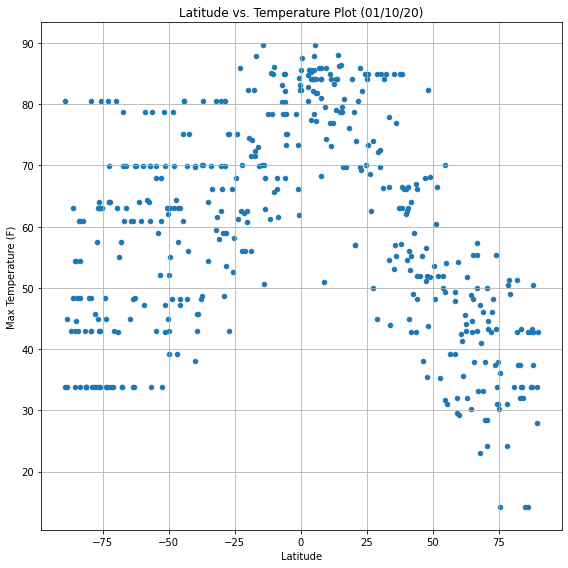

In [30]:
tem_scatter = clean_city_data.plot(kind="scatter", x="Latitude", y="Max Temp", grid=True, figsize=(8,8), title= "Latitude vs. Temperature Plot (01/10/20)")
tem_scatter.set_xlabel("Latitude")
tem_scatter.set_ylabel("Max Temperature (F)")
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

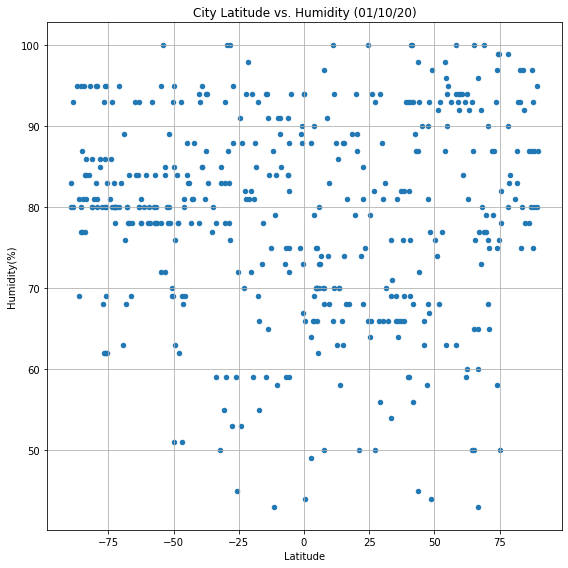

In [31]:
tem_scatter = clean_city_data.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8), title= "City Latitude vs. Humidity (01/10/20)")
tem_scatter.set_xlabel("Latitude")
tem_scatter.set_ylabel("Humidity(%)")
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

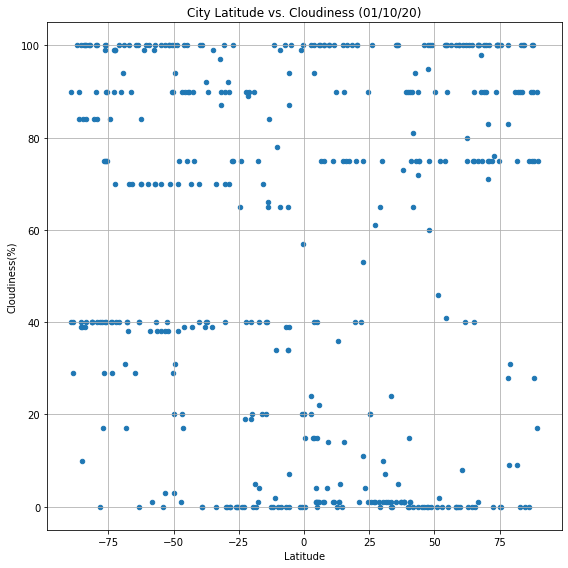

In [32]:
tem_scatter = clean_city_data.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8), title= "City Latitude vs. Cloudiness (01/10/20)")
tem_scatter.set_xlabel("Latitude")
tem_scatter.set_ylabel("Cloudiness(%)")
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

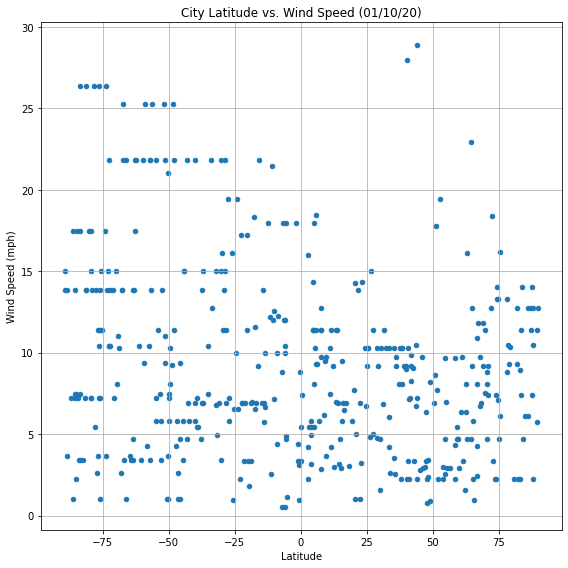

In [33]:
wind_scatter = clean_city_data.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(8,8), title= "City Latitude vs. Wind Speed (01/10/20)")
wind_scatter.set_xlabel("Latitude")
wind_scatter.set_ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.show()

## Linear Regression

In [53]:
northern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"]>0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"]<0]
southern_hemisphere.head()

,Unnamed: 0,Cities,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,busselton,-61.263477,87.635957,64.00,80.0,99.0,10.42,AU,1.601428e+09
4,4,albany,-57.070868,104.717368,61.00,84.0,100.0,3.44,US,1.601428e+09
7,7,tautira,-17.085562,-141.871165,87.80,55.0,40.0,6.93,PF,1.601428e+09
8,8,carnarvon,-25.945395,109.640780,66.20,59.0,0.0,16.11,AU,1.601428e+09
11,11,victoria,-6.143577,50.141485,84.99,84.0,34.0,12.03,HK,1.601428e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8605194772233211


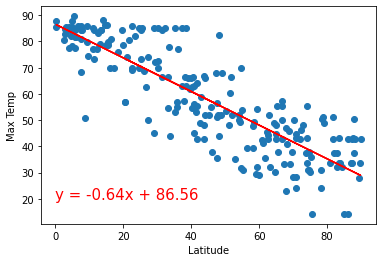

In [51]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5757037963846712


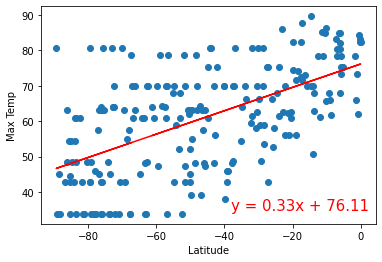

In [59]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-38,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.29099568024899947


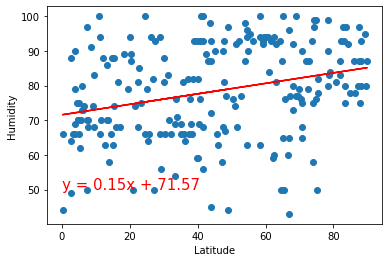

In [63]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.09810654303203496


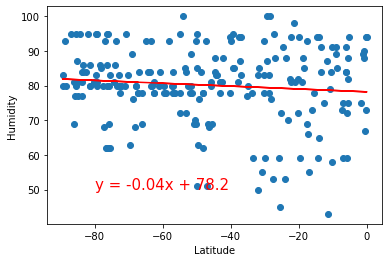

In [65]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2723845122546356


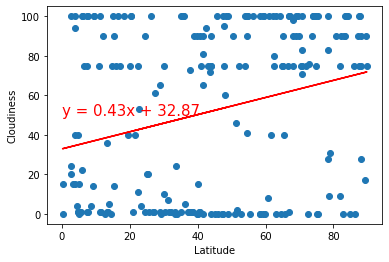

In [66]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.25532623665270016


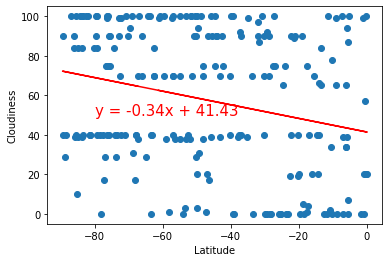

In [67]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02637227983221432


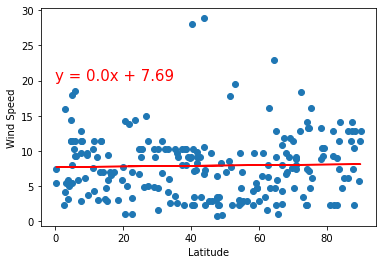

In [74]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.165885863178537


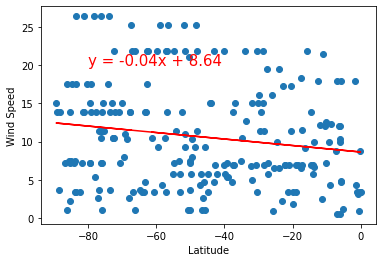

In [71]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()